In [1]:
from zeta import *


In [2]:
d = np.array([3,2,1])

In [3]:
##import data from file if exists

folder_name = "d_" + str(d).replace(" ", "").replace("[", "").replace("]", "")
path = "roots_zeta/" + folder_name + "/data.npz"
data = np.load(path)

q_2 = data['q_2']
z_d_results = data['z_d_results']
roots = data['zeros']
asymototes = data['asymptotes']
q_2_plot = np.copy(q_2)
zeta_plot = np.copy(z_d_results)

nth_root = 0
x_0  = roots[nth_root]

# Taylor expansion


In [4]:



if asymototes[nth_root] > x_0:
    lower_bound = 0
    upper_bound = asymototes[nth_root]
    closest_asymotote = asymototes[nth_root]
else:
    lower_bound = asymototes[nth_root]
    upper_bound = asymototes[nth_root+1]
    d1  = abs(x_0 - lower_bound)
    d2  = abs(x_0 - upper_bound)
    if d1 < d2:
        closest_asymotote = lower_bound
    else:
        closest_asymotote = upper_bound
    


range_graph = upper_bound-lower_bound
lower_bound = lower_bound - range_graph/20
upper_bound = upper_bound + range_graph/20



shaded_region = np.linspace(x_0-abs(closest_asymotote-x_0), x_0+abs(closest_asymotote-x_0), 1000)
shaded_y = np.linspace(-50,50,1000)


In [9]:
s_max = 50
Xi_sq = 10**3


c_s = [derivative(x_0, 5e4 if s == 1 else 1e3, s, d) for s in range(1,s_max)]
taylor = lambda x: sum([c_s[i]*((x-x_0)**(i+1)) for i in range(s_max-1)])

KeyboardInterrupt: 

In [31]:
print(c_s)

[350.3832170273869, 3030.3913326770103, 131188.7394758673, 1387736.3159266603, 52208964.16878775, 623816395.3592479, 20919546772.12326, 275583498283.47565, 8431038245691.143, 120202099010965.89, 3415280525648792.5, 5.193010748238933e+16, 1.389638577714271e+18, 2.227165427043334e+19, 5.6760111231294754e+20, 9.497795773575958e+21, 2.3260090406466472e+23, 4.032364684807989e+24, 9.558582952299455e+25, 1.7059460188892166e+27, 3.937338118229581e+28, 7.196956897138631e+29, 1.6250875449002296e+31, 3.0293685011250346e+32, 6.718559155310757e+33, 1.2728142474776926e+35, 2.781517569080786e+36, 5.339967058412153e+37, 1.1529031112917094e+39, 2.2376559020594433e+40, 4.783260545308904e+41, 9.367549682031803e+42, 1.986113319907842e+44, 3.9184539618447816e+45, 8.252261700273197e+46, 1.638033234886084e+48, 3.4306869347600096e+49, 6.843860663065546e+50, 1.426877996423349e+52, 2.858194685373228e+53, 5.936846483861998e+54, 1.1932423239611814e+56, 2.4709245726000753e+57, 4.9801157389056835e+58, 1.02866563861

In [32]:
Xi_sq = 10**3


first = first_deriv(x_0, 5e4, d)
second = second_deriv(x_0, 1e3, d)
taylor2 = lambda x: (x-x_0)*first + (x-x_0)**2*second/2
print(first)
print(second/2)

-388.7937054301644
1394.3430866192612


In [33]:
s_3_max = 10
fac = lambda n: 1 if n == 0 else n*fac(n-1)
c_s_3 = [derivative_sympy(x_0, 5e4 if s == 1 else 1e3, s, d)/fac(s) for s in range(1,s_3_max)]
c_s_3[0] = c_s[0]/fac(1)

taylor3 = lambda x: sum([c_s_3[i]*((x-x_0)**(i+1)) for i in range(s_3_max-1)])
print(c_s_3)

#print(derivative_sympy(x_0, 5e4, 1, d))

[350.3832170273869, -1325.220068246668, 36658.88892795992, -583072.4547069251, 11613379.090375546, -208037106.9431074, 3910518422.589106, -71891133814.13971, 1335181718723.7715]


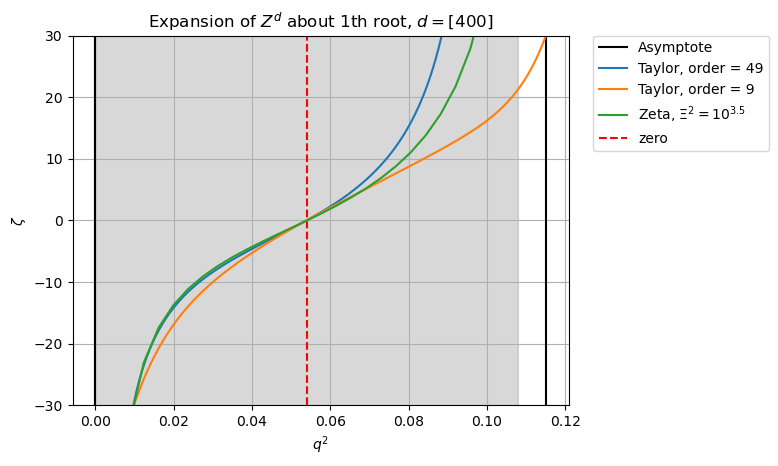

In [34]:

x = np.linspace(lower_bound-0.1, upper_bound+0.1, 1000)
#mark x_0 with a red vertical line
plt.axvline(x_0, color='r', linestyle='--', label="zero")

for i in asymototes:
    q_2_plot= np.insert(q_2_plot, np.argmax(q_2_plot >= i),i)
    zeta_plot = np.insert(zeta_plot, np.argmax(q_2_plot >= i),np.nan)

#plot the closest asymptote
#plot all asymptotes
for i in asymototes:
    plt.axvline(i, color='black', linestyle='-', label ='Asymptote')

#plot the shaded region

plt.fill_between(shaded_region, min(taylor(shaded_region)), max(taylor(shaded_region)), color='grey', alpha=0.3)
plt.plot(x, taylor(x), label="Taylor, order = " + str(s_max-1))
plt.plot(x, taylor3(x), label="Taylor, order = " + str(s_3_max-1))
#plt.plot(x, taylor2(x), label="Taylor, linear")
plt.plot(q_2_plot, zeta_plot, label = "Zeta, $\Xi^2 = 10^{3.5}$")
plt.ylim(-30,30)
plt.xlim(lower_bound,upper_bound)

handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]

#plot the legend outside the graph
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel(r'$q^2$')
plt.ylabel(r'$\zeta$')
#Expansion of Z^d, (d = ...) about the (n=..)th root
plt.title('Expansion of $Z^d$ about {}th root, $d = {}$'.format(nth_root,d) )

plt.grid()

In [57]:
from zeta import *
dx = 1e-10
print(c_s[0])

f = lambda x: (zeta(x+dx,1e4, 1, d) - zeta(x,1e4, 1, d))/dx

print(f(x_0))
print((f(x_0+dx)-f(x_0))/dx)
#print(x_0/np.linalg.norm(d))
#print(np.linalg.norm(d)/x_0)

print(x_0)
print(d)

350.3832170273869
305.1370976984729
12729817.158856349
0.05401685698378193
[4 0 0]


In [45]:
d_sc = np.linalg.norm(d)
m_tilde_sq = (4/np.pi)**2
beta = d_sc/np.sqrt(d_sc**2 + m_tilde_sq+4*x_0)
print(beta**4)
gamma = 1/np.sqrt(1-beta**2)
E_cm = np.sqrt(4*x_0+m_tilde_sq+d_sc**2)
print(2*gamma*beta/(E_cm**2))

0.8046116038726485
0.33089040911812945


## Convergence of Taylor expansion

110.14396079078388


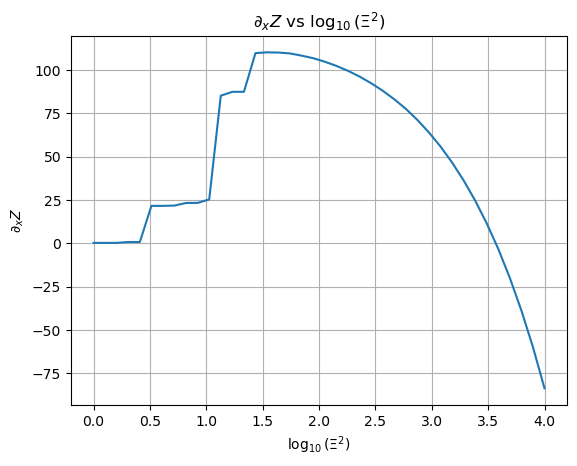

In [6]:


ks = np.linspace(0, 4, 40)

y = [derivative_sympy(x_0, 10**(k), 1, d) for k in ks]

#label and format the graph
plt.xlabel(r'$\log_{10}(\Xi^2)$')
plt.ylabel(r'$\partial_xZ$')
plt.title(r'$\partial_xZ$ vs $\log_{10}(\Xi^2)$')
plt.grid()


plt.plot(ks, y)

print(max(y))

In [5]:
from zeta import *
from derivative import *
print(d)

[3 2 1]


In [6]:

alpha = 0.1


In [7]:
dx = 1e-10
alpha  = -1
print(d)
S = zeta(x_0, 1e4, alpha, d)
print((zeta(x_0+dx, 1e4, alpha, d) - S)/dx)
#print(S)

#alpha = 0.1
derivative_LT(x_0, 3e4, d, alpha, S)

[3 2 1]
165.96158907770862


165.961946616553

In [8]:
x_0

0.3498536194716991

179.51766523655073


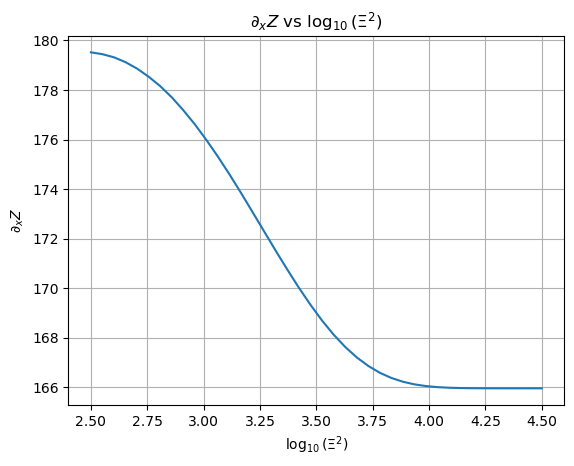

In [9]:
ks = np.linspace(2.5, 4.5, 40)

alpha = 0.01
y = [derivative_LT(x_0, 10**(k), d, alpha, 0) for k in ks]

derivative_LT()
#label and format the graph
plt.xlabel(r'$\log_{10}(\Xi^2)$')
plt.ylabel(r'$\partial_xZ$')
plt.title(r'$\partial_xZ$ vs $\log_{10}(\Xi^2)$')
plt.grid()


plt.plot(ks, y)

print(max(y))

In [10]:
print(alpha_recommended(x_0, 1e4, d))

0.1044222264473853
